In [41]:
country = {
    'Austria': 'AUT',
    'Belarus': 'BLR',
    'Belgium': 'BEL',
    'Bulgaria': 'BGR',
    'Canada': 'CAN',
    'Chile': 'CHL',
    'Czechia': 'CZE',
    'Denmark': 'DNK',
    'Estonia': 'EST',
    'Finland': 'FIN',
    'Germany': 'DEUTNP',
    'Germany East': 'DEUTE',
    'Germany West': 'DEUTW',
    'Hungary': 'HUN',
    'Iceland': 'ISL',
    'Ireland': 'IRL',
    'Italy': 'ITA',
    'Japan': 'JPN',
    'Lithuania': 'LTU',
    'Netherlands': 'NLD',
    'Norway': 'NOR',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Republic of Korea': 'KOR',
    'Russia': 'RUS',
    'Slovakia': 'SVK',
    'Slovenia': 'SVN',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Taiwan': 'TWN',
    'United Kingdom': 'GBR_NP',
    'UK - England and Wales': 'GBRTENW',
    'UK - Northern Ireland': 'GBR_NIR',
    'UK - Scotland': 'GBR_SCO',
    'Ukraine': 'UKR',
    'USA': 'USA'
}

asia      = ['JPN', 'KOR', 'TWN']
hokuou    = ['DNK', 'FIN', 'ISL', 'NOR']
touou1    = ['RUS', 'UKR','BLR', 'LTU', ]
touou2    = ['POL', 'SVK', 'HUN', 'CZE', 'BGR', 'EST']
oushu1    = ['IRL', 'CHE', 'ITA', 'ESP', 'PRT', 'NLD', 'BEL', 'SVN']
oushu2    = ['GBR_NP', 'GBRTENW', 'GBR_NIR','GBR_SCO']
oushu3    = ['DEUTENP', 'DEUTW', 'DEUTE']
oseania   = ['AUT', 'NLD']
hokubei   = ['USA', 'CAN']
chunanbei = ['CHL']

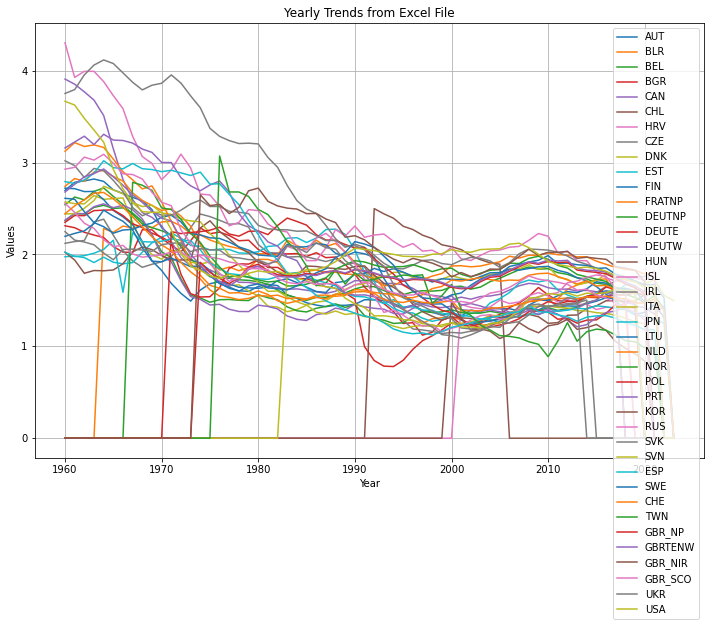

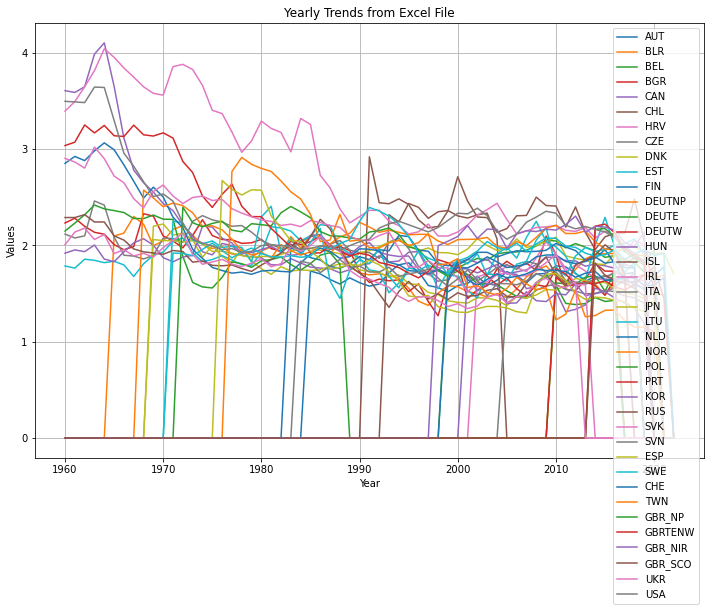

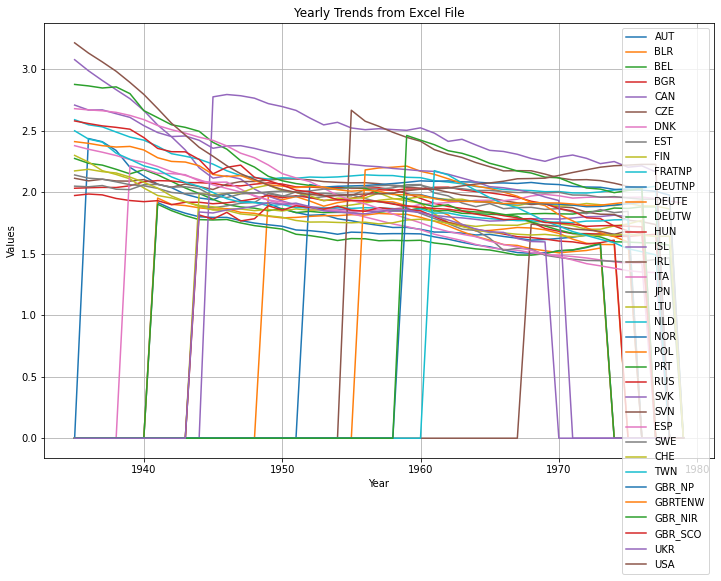

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_excel_data(file_path, index_name='PERIOD', sheet_name=0, header_row=2, encoding='utf-8'):
    """
    エクセルファイルからデータを読み込み、複数の列の年次推移データを重ねてプロットする。

    Parameters:
    file_path (str): エクセルファイルのパス
    sheet_name (str or int): 読み込むシート名またはシート番号
    header_row (int): 列名が含まれる行のインデックス (0-based)
    encoding (str): ファイルのエンコーディング
    """
    try:
        # エクセルファイルを読み込む
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row, engine='openpyxl')

        # 年次データが含まれる列を抽出
        if index_name not in df.columns:
            print(f"警告: '{file_path}' に '{index_name}'列がありません。")
            return

        # 年次列をインデックスとして設定
        df.set_index(index_name, inplace=True)
        
        # グラフを描画
        plt.figure(figsize=(12, 8))
        for column in df.columns:
            plt.plot(df.index, df[column], label=column)
        
        # グラフのラベルとタイトルを設定
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title('Yearly Trends from Excel File')
        plt.legend()
        plt.grid(True)
        
        # グラフを表示
        plt.show()
        
    except Exception as e:
        print(f"エラー: {e}")

# エクセルファイルのパスを指定
excel_file_path_TFR = '../../database/csv/TFR.xlsx'
excel_file_path_adjTFR = '../../database/csv/adjTFR.xlsx'
excel_file_path_CCF = '../../database/csv/CCF.xlsx'

# プロット関数を呼び出し
plot_excel_data(excel_file_path_TFR, sheet_name=1)
plot_excel_data(excel_file_path_adjTFR, sheet_name=1)
plot_excel_data(excel_file_path_CCF, index_name='COHORT', sheet_name=1)


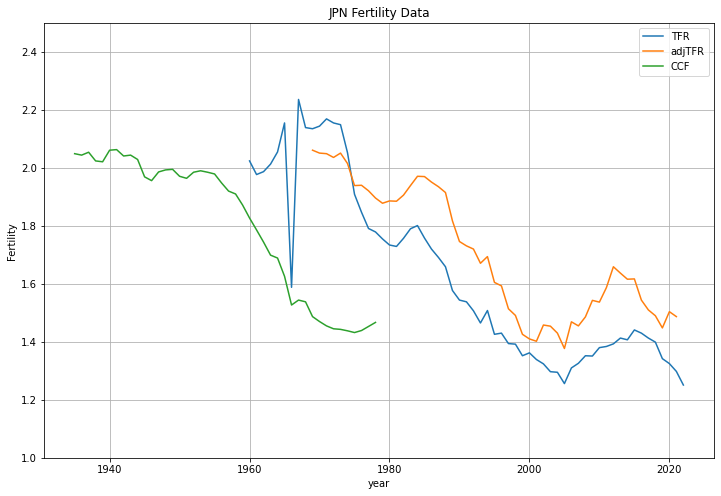

<Figure size 432x288 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# エクセルファイルのパスをリストにします
excel_files = ['../../database/csv/TFR.xlsx', '../../database/csv/adjTFR.xlsx', '../../database/csv/CCF.xlsx']
index_names = ['PERIOD', 'PERIOD', 'COHORT']
file_names  = ['TFR', 'adjTFR', 'CCF']

# エクセルファイルを読み込む
df_TFR    = pd.read_excel(excel_files[0], sheet_name=1, header=2, engine='openpyxl')
df_adjTFR = pd.read_excel(excel_files[1], sheet_name=1, header=2, engine='openpyxl')
df_CCR    = pd.read_excel(excel_files[2], sheet_name=1, header=2, engine='openpyxl')

# データフレーム編集。期間とJPNの情報に限定
df_TFR = df_TFR[['PERIOD', 'JPN']]
df_adjTFR = df_adjTFR[['PERIOD', 'JPN']]
df_CCR = df_CCR[['COHORT', 'JPN']]

# 年次列をインデックスとして設定
df_TFR.set_index(index_names[0], inplace=True)
df_adjTFR.set_index(index_names[1], inplace=True)
df_CCR.set_index(index_names[2], inplace=True)

# 欠損値のある行を削除
df_TFR.replace(0.0, pd.NA, inplace=True)   # 0を欠損値として扱う（必要に応じて）
df_adjTFR.replace(0.0, pd.NA, inplace=True)   # 0を欠損値として扱う（必要に応じて）
df_CCR.replace(0.0, pd.NA, inplace=True)   # 0を欠損値として扱う（必要に応じて）

df_TFR.dropna(inplace=True)
df_adjTFR.dropna(inplace=True)
df_CCR.dropna(inplace=True)

# グラフを描画
plt.figure(figsize=(12, 8))

plt.plot(df_TFR.index, df_TFR['JPN'], linestyle='-', label=file_names[0])
plt.plot(df_adjTFR.index, df_adjTFR['JPN'], linestyle='-', label=file_names[1])
plt.plot(df_CCR.index, df_CCR['JPN'], linestyle='-', label=file_names[2])

# y軸の範囲を0からに設定
plt.ylim(1, 2.5)  # データの最大値より少し大きい範囲を設定

plt.xlabel('year')
plt.ylabel('Fertility')
plt.title('JPN Fertility Data')
plt.legend()
plt.grid(True)
plt.show()

#plt.savefig('my_graph.png')  # 画像ファイルとして保存

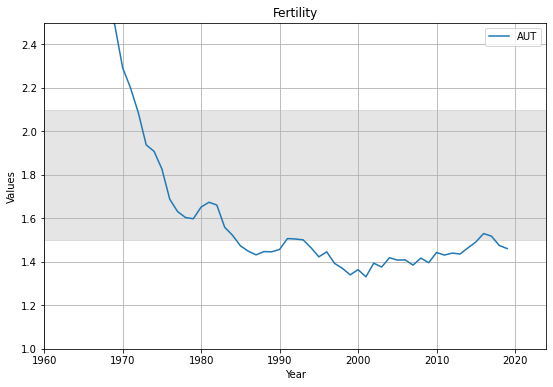

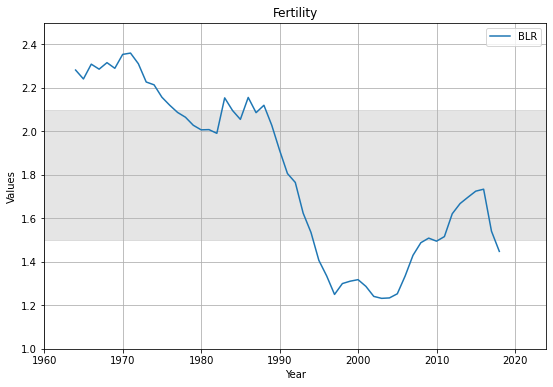

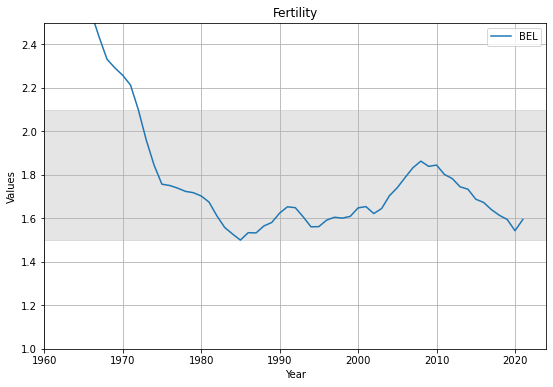

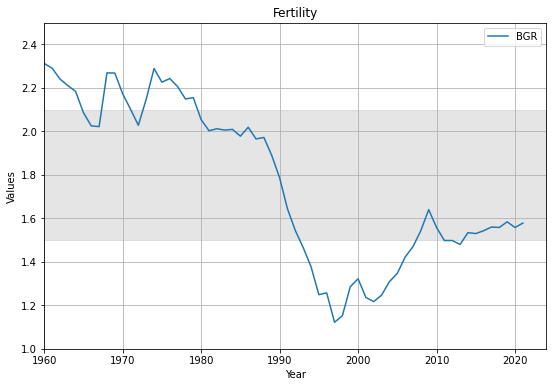

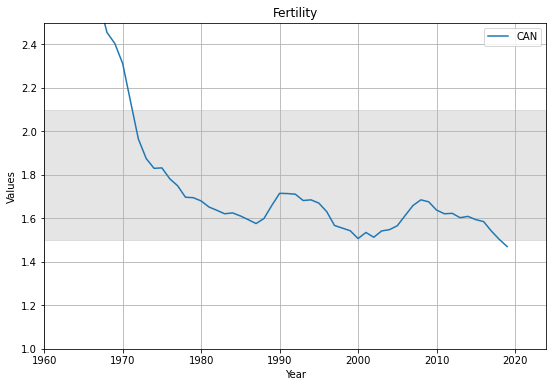

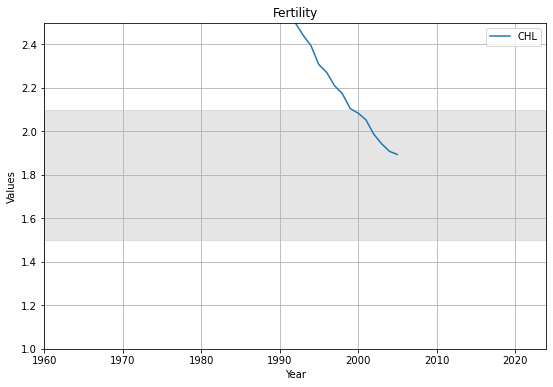

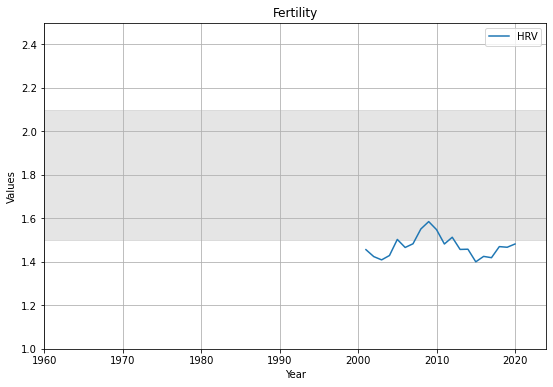

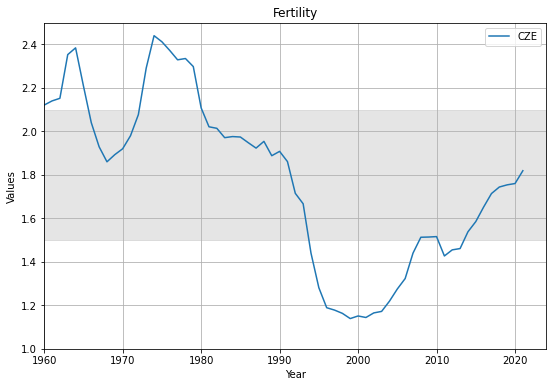

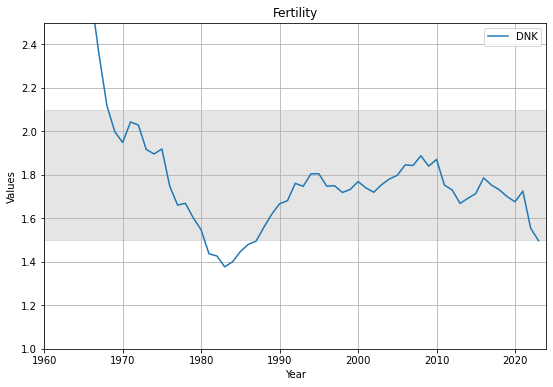

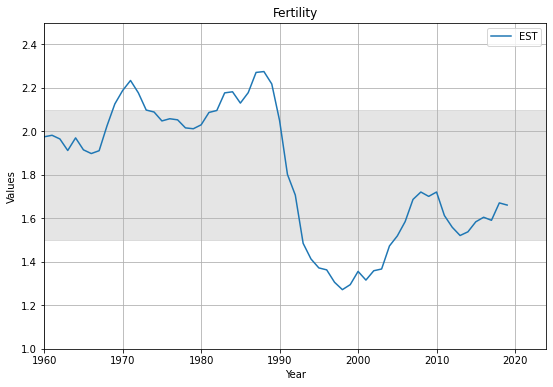

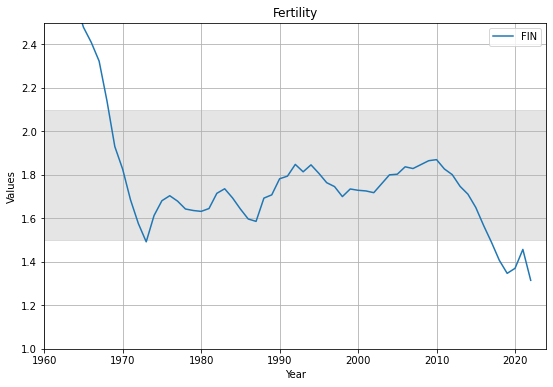

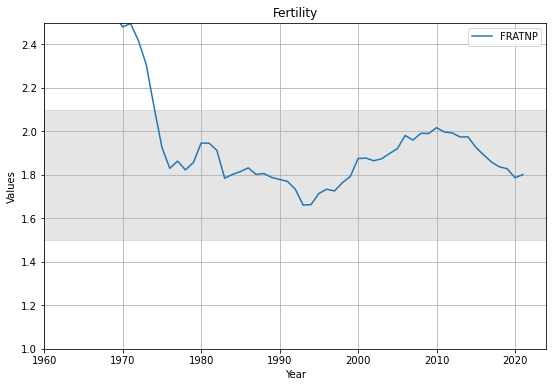

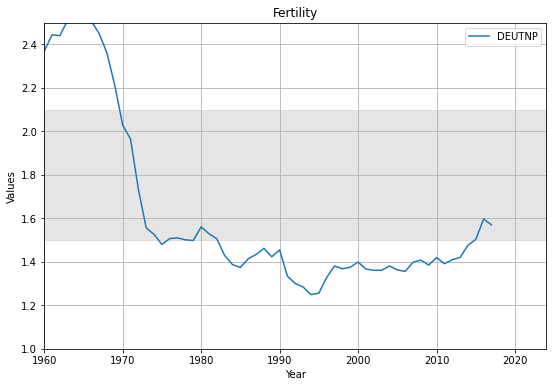

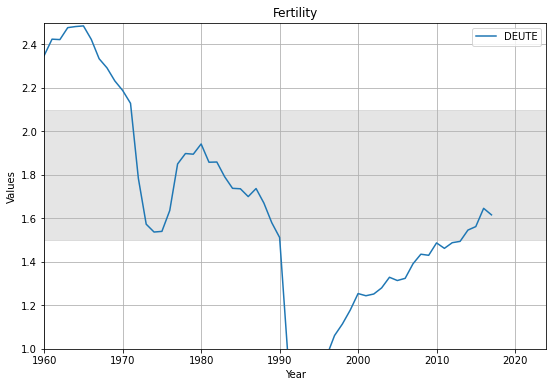

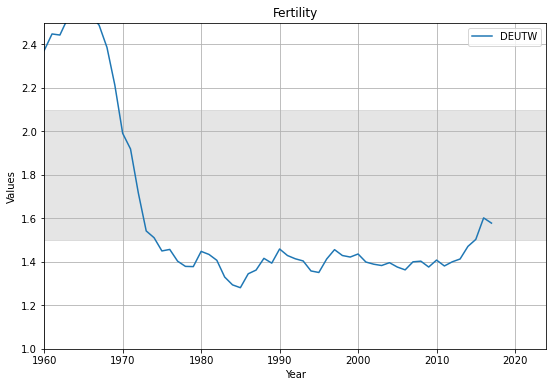

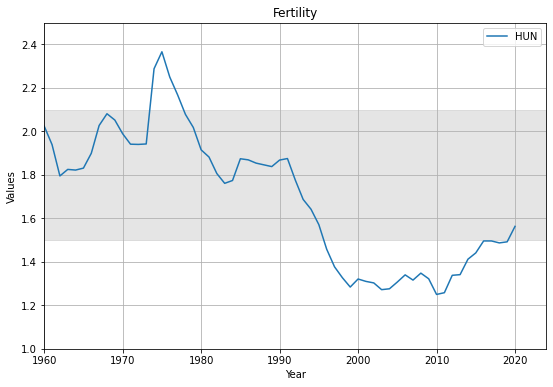

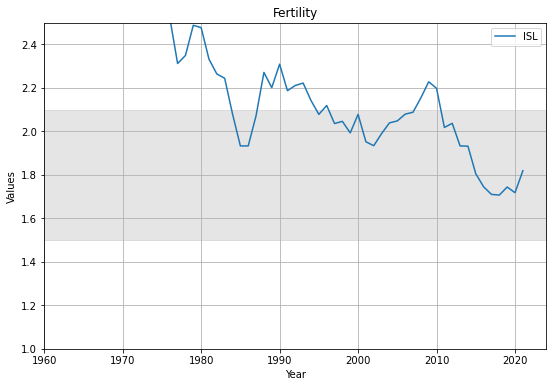

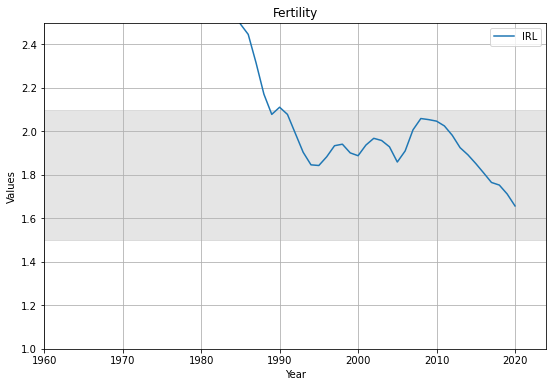

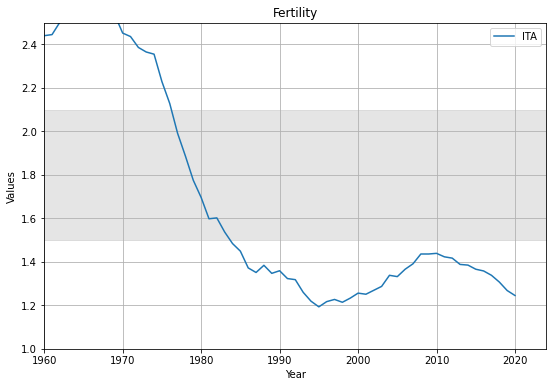

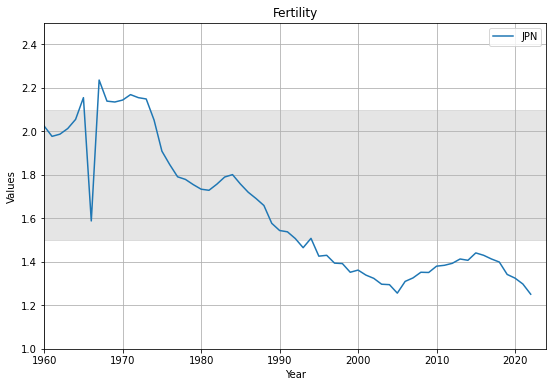

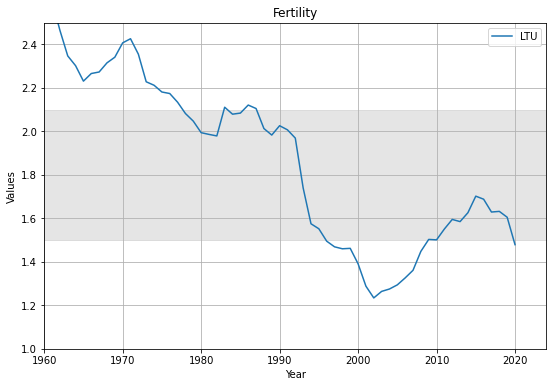

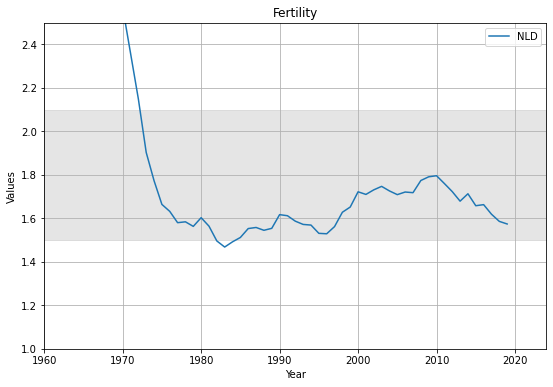

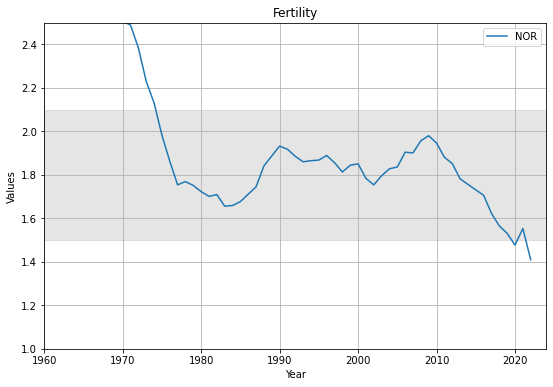

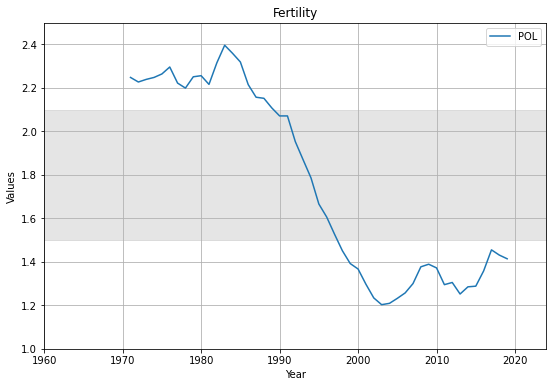

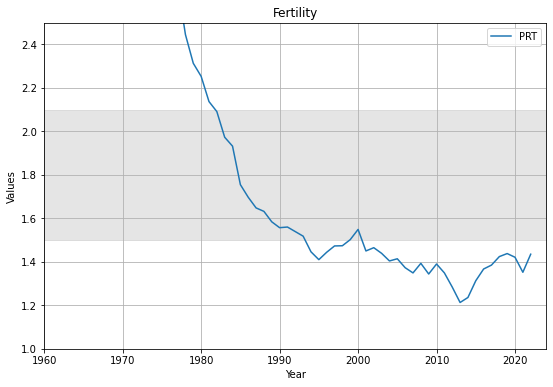

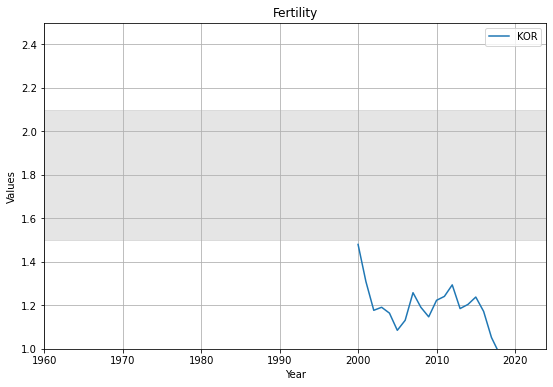

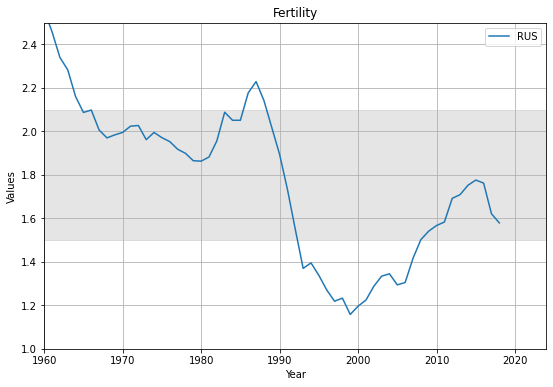

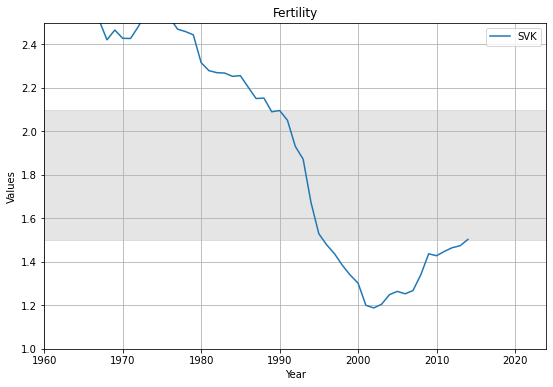

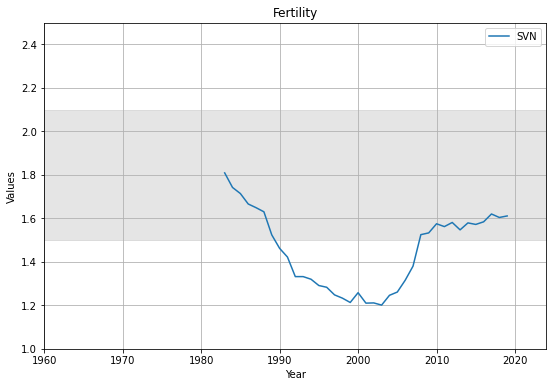

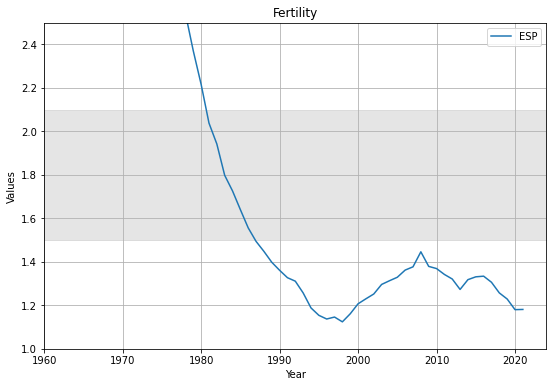

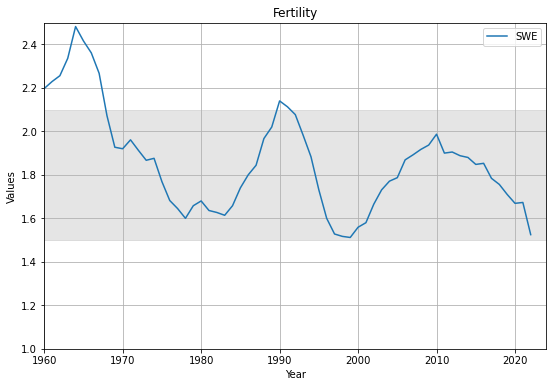

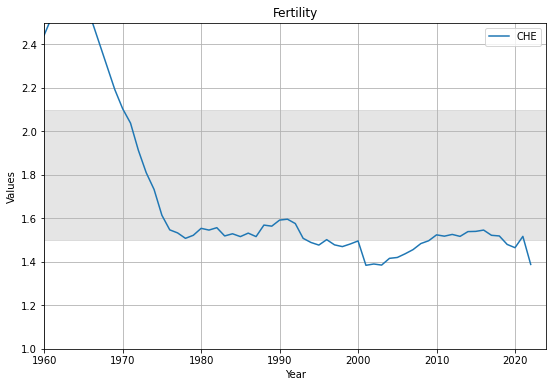

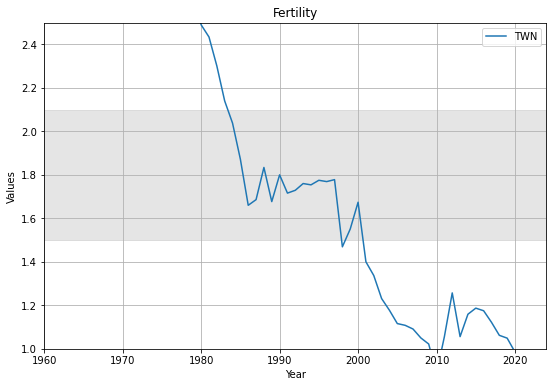

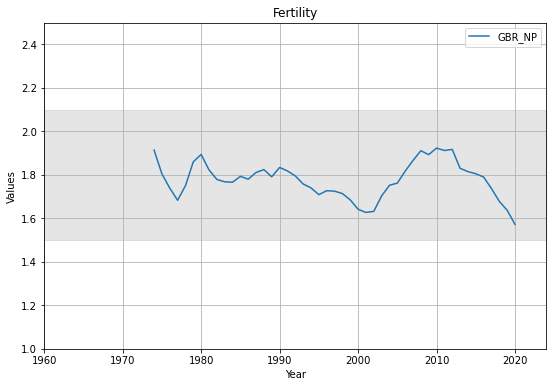

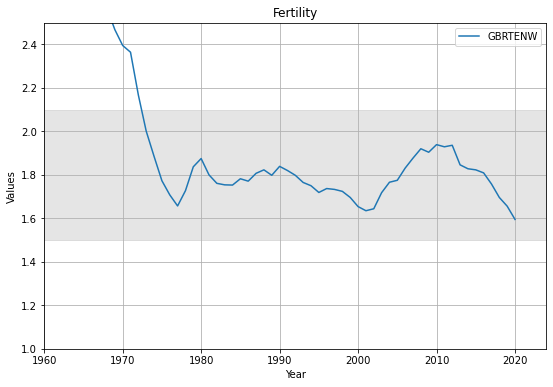

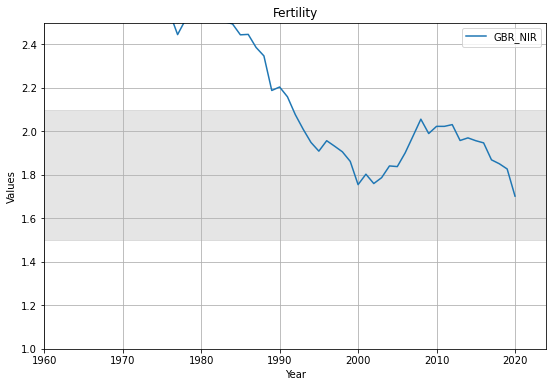

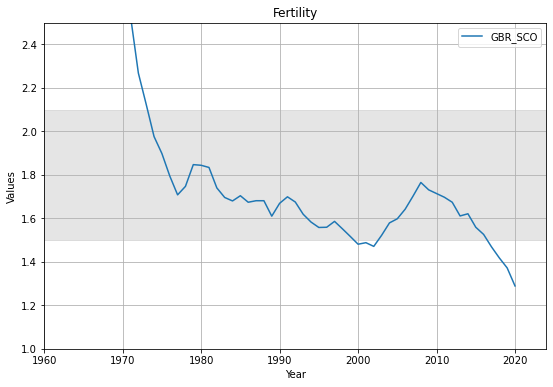

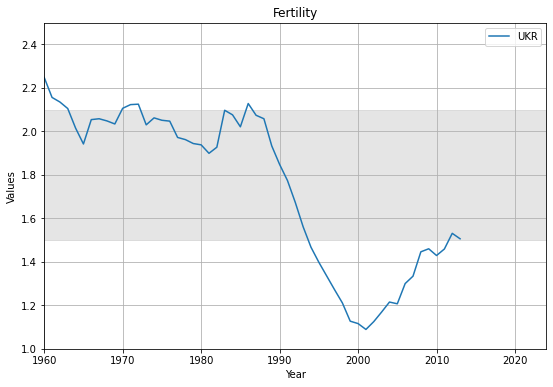

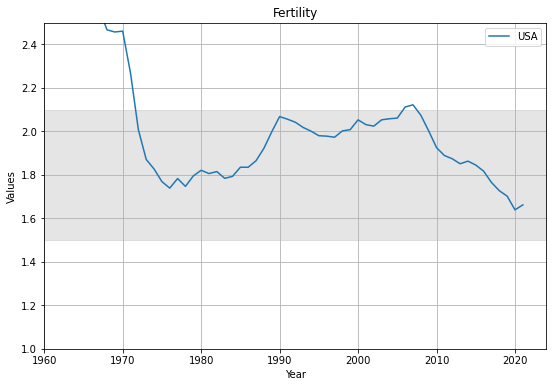

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_excel_data(file_path, country='JPN', index_name='PERIOD', sheet_name=0, header_row=2, encoding='utf-8'):
    """
    エクセルファイルからデータを読み込み、複数の列の年次推移データを重ねてプロットする。

    Parameters:
    file_path (str): エクセルファイルのパス
    sheet_name (str or int): 読み込むシート名またはシート番号
    header_row (int): 列名が含まれる行のインデックス (0-based)
    encoding (str): ファイルのエンコーディング
    """
    x = range(1960, 2025)
    
    try:
        # エクセルファイルを読み込む
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row, engine='openpyxl')

        # 年次データが含まれる列を抽出
        if index_name not in df.columns:
            print(f"警告: '{file_path}' に '{index_name}'列がありません。")
            return

        # 年次列をインデックスとして設定
        df.set_index(index_name, inplace=True)
        
        for column in df.columns:
            
            # グラフを描画
            plt.figure(figsize=(9, 6))
            
            # 0を欠損値として扱う（必要に応じて）
            df_a = df[[column]].copy()
            df_a.replace(0.0, pd.NA, inplace=True)
            df_a.dropna(inplace=True)
    
            plt.plot(df_a.index, df_a[column], label=column)
        
            # 軸の範囲設定
            plt.xlim(1960, 2024)
            plt.ylim(1, 2.5)
            
            plt.fill_between(x, 1.5, 2.1, color='gray', alpha=0.2)
            # グラフのラベルとタイトルを設定
            plt.xlabel('Year')
            plt.ylabel('Values')
            plt.title('Fertility')
            plt.legend()
            plt.grid(True)

            # グラフを表示
            plt.show()
        
    except Exception as e:
        print(f"エラー: {e}")

# エクセルファイルのパスを指定
excel_file_path = '../../database/csv/TFR.xlsx'

# プロット関数を呼び出し
plot_excel_data(excel_file_path, sheet_name=1)


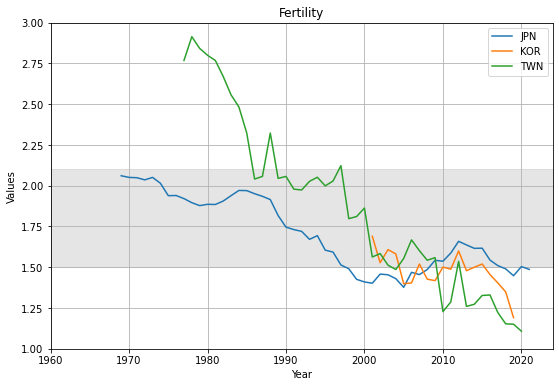

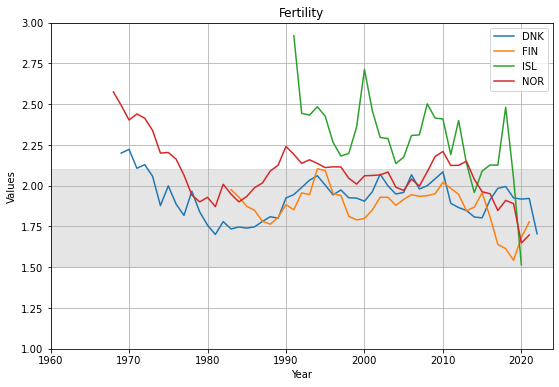

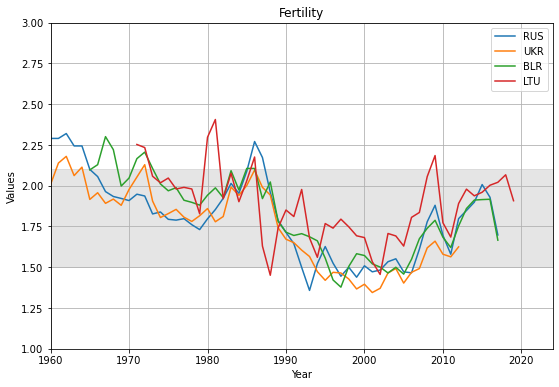

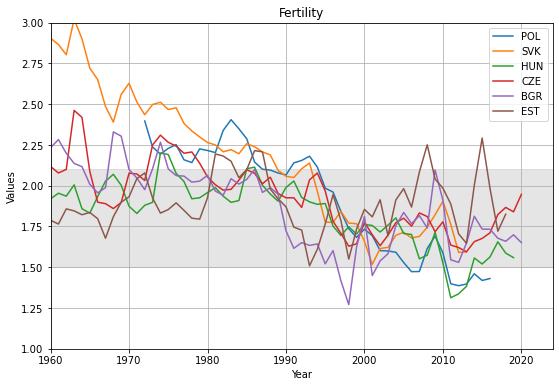

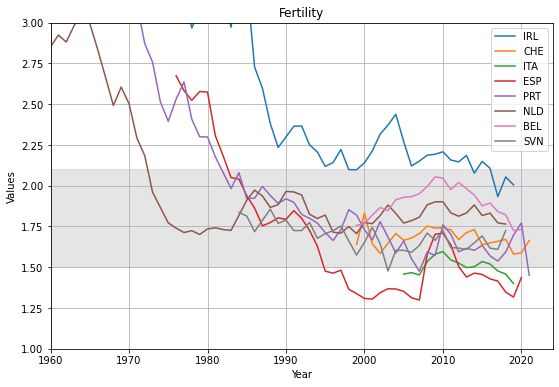

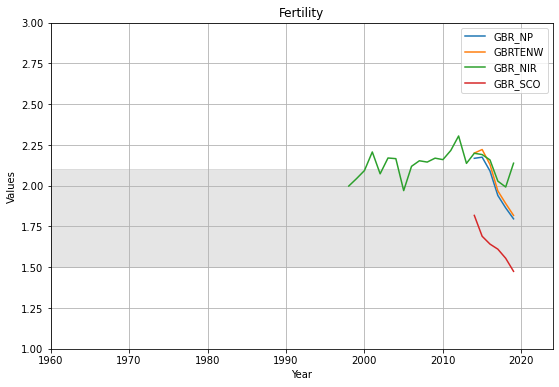

エラー: "None of [Index(['DEUTENP'], dtype='object')] are in the [columns]"


<Figure size 648x432 with 0 Axes>

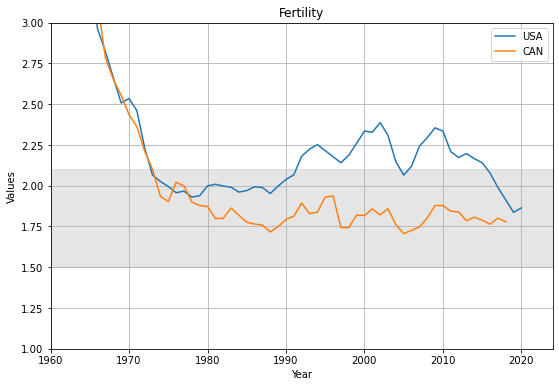

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_excel_data(file_path, country, index_name='PERIOD', sheet_name=0, header_row=2, encoding='utf-8'):
    """
    エクセルファイルからデータを読み込み、複数の列の年次推移データを重ねてプロットする。

    Parameters:
    file_path (str): エクセルファイルのパス
    sheet_name (str or int): 読み込むシート名またはシート番号
    header_row (int): 列名が含まれる行のインデックス (0-based)
    encoding (str): ファイルのエンコーディング
    """
    x = range(1960, 2025)
    
    try:
        # エクセルファイルを読み込む
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row, engine='openpyxl')

        # 年次データが含まれる列を抽出
        if index_name not in df.columns:
            print(f"警告: '{file_path}' に '{index_name}'列がありません。")
            return

        # 年次列をインデックスとして設定
        df.set_index(index_name, inplace=True)
        # グラフを描画
        plt.figure(figsize=(9, 6))
        
        for column in country:
            
            # 0を欠損値として扱う（必要に応じて）
            df_a = df[[column]].copy()
            df_a.replace(0.0, pd.NA, inplace=True)
            df_a.dropna(inplace=True)
    
            plt.plot(df_a.index, df_a[column], label=column)
        
        # 軸の範囲設定
        plt.xlim(1960, 2024)
        plt.ylim(1, 3)

        plt.fill_between(x, 1.5, 2.1, color='gray', alpha=0.2)
        # グラフのラベルとタイトルを設定
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title('Fertility')
        plt.legend()
        plt.grid(True)

        # グラフを表示
        plt.show()
        
    except Exception as e:
        print(f"エラー: {e}")

# エクセルファイルのパスを指定
excel_file_path = '../../database/csv/adjTFR.xlsx'

# プロット関数を呼び出し
plot_excel_data(excel_file_path, country=asia, sheet_name=1)
plot_excel_data(excel_file_path, country=hokuou, sheet_name=1)
plot_excel_data(excel_file_path, country=touou1, sheet_name=1)
plot_excel_data(excel_file_path, country=touou2, sheet_name=1)
plot_excel_data(excel_file_path, country=oushu1, sheet_name=1)
plot_excel_data(excel_file_path, country=oushu2, sheet_name=1)
plot_excel_data(excel_file_path, country=oushu3, sheet_name=1)
plot_excel_data(excel_file_path, country=hokubei, sheet_name=1)